In [0]:
#Description : Image processing using CNN for vehicle detection


In [0]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
#Get the shape of x_train
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('x_test shape:', x_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_test shape:', y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [24]:
#Take a look at the first image (at index=0) in the training data set as a numpy array
#This shows the image as a series of pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

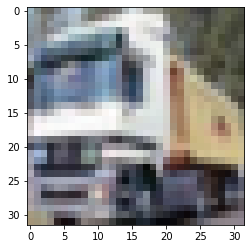

In [25]:
#Show the image as an image instead of a series of pixel values using matplotlib
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])

In [22]:
#Print the label of the image, NOTE: 
#0 = airplane
#1 = automobile
#2 = bird
#3 = cat
#4 = deer
#5 = dog
#6 = frog
#7 = horse
#8 = ship
#9 = truck
print('The label is:', y_train[1])

The label is: [9]


In [0]:


#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)



In [24]:
#Print all of the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [25]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
#normalize the pixels in the images to be a value between 0 and 1 , they are normally values between 0 and 255
#doing this will help the neural network.
x_train = x_train / 255
x_test = x_test / 255

In [0]:
#Build The CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential() #Create the architecture

#Convolution layer to extract features from the input image, and create 32 ReLu
#5x5 convolved features/layers aka feature map.
#Note:You must input the input shape only in this first layer.
# number of output channels or convolution filters = 32
# number of rows in the convolution kernel
# number of cols in the convolution kernel
# input shape 32x32 RGB image, so spacially it's 3-Dimensional
# activation function Rectifier Linear Unit aka (ReLu)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 


#Pooling layer with a 2x2 filter to get the max element from the convolved features , 
#this reduces the dimensionality by half e.g. 16x16, aka sub sampling
#Note: the default for stride is the pool_size
model.add(MaxPooling2D(pool_size=(2, 2)))



#2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

#Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening, Flattens the input. Does not affect the batch size. 
#(Flattening occurs when you reduce all layers to one background layer), 
#this makes the image a linear array or 1D Array or 1D Vector to 
#feed into or connect with the neural network
model.add(Flatten())
model.add(Dense(1000, activation='relu')) # a layer with 1000 neurons and activation function ReLu
model.add(Dense(10, activation='softmax')) #a layer with 10 output neurons for each label using softmax activation function

In [29]:
model.compile(loss='categorical_crossentropy', # loss function used for classes that are greater than 2)
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
#Batch: Total number of training examples present in a single batch
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and 
#      backward through the neural network only ONCE.
#Fit: Another word for train

#NOTE: We don't need to use validation_data, so we didn't have to split the data 
#into a validation sets. We just put in 0.2 and this splits the data 20% for us.
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )



Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 85s 2ms/step - loss: 1.6449 - acc: 0.4059 - val_loss: 1.4244 - val_acc: 0.4815
Epoch 2/10
35000/35000 [==============================] - 78s 2ms/step - loss: 1.3114 - acc: 0.5308 - val_loss: 1.2337 - val_acc: 0.5635
Epoch 3/10
35000/35000 [==============================] - 79s 2ms/step - loss: 1.1543 - acc: 0.5921 - val_loss: 1.1541 - val_acc: 0.5953
Epoch 4/10
35000/35000 [==============================] - 81s 2ms/step - loss: 1.0499 - acc: 0.6295 - val_loss: 1.1413 - val_acc: 0.6005
Epoch 5/10
35000/35000 [==============================] - 78s 2ms/step - loss: 0.9607 - acc: 0.6639 - val_loss: 1.0925 - val_acc: 0.6205
Epoch 6/10
35000/35000 [==============================] - 79s 2ms/step - loss: 0.8745 - acc: 0.6948 - val_loss: 1.0134 - val_acc: 0.6474
Epoch 7/10
35000/35000 [==============================] - 81s 2ms/step - loss: 0.7922 - acc: 0.7227 - val_loss: 0.9659 - val_a

In [32]:
#Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]
#test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 8s 832us/step


0.6826

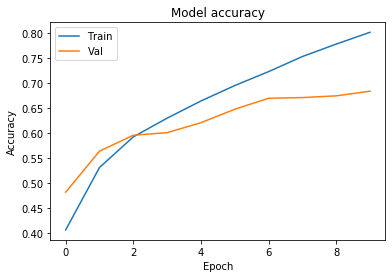

In [33]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

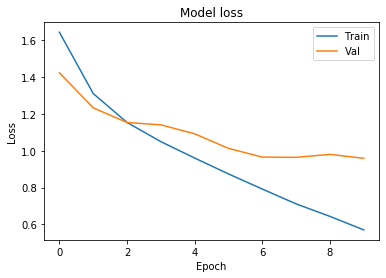

In [34]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [37]:
!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [0]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
my_image = plt.imread("carimage.jpg") #Read in the image (3, 14, 20)

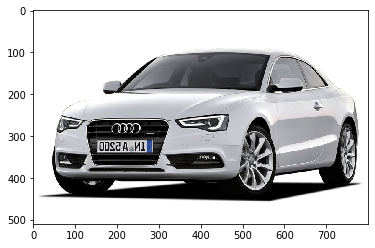

In [40]:


#Show the uploaded image
img = plt.imshow(my_image)



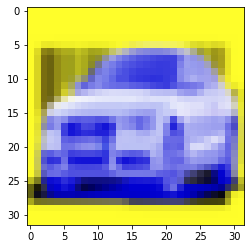

In [41]:
#Resize & Show the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image

In [0]:
#Get the probabilities for each class
#model.predict function is expecting an array, so we will use np.array to make this transformation on the image
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [43]:
#Show the probability for each class
probabilities

array([[8.2530988e-07, 9.8981583e-01, 2.6952539e-06, 4.4245791e-08,
        6.0340316e-11, 8.7424348e-07, 5.0770105e-10, 1.6724802e-07,
        8.4958188e-08, 1.0179483e-02]], dtype=float32)

In [44]:
number_to_class = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'vehicle']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: car -- Probability: 0.98981583
Second most likely class: vehicle -- Probability: 0.010179483
Third most likely class: bird -- Probability: 2.695254e-06
Fourth most likely class: dog -- Probability: 8.742435e-07
Fifth most likely class: airplane -- Probability: 8.253099e-07


In [0]:
#To save this model 
model.save('my_model.h5')

In [0]:
#To load this model
from keras.models import load_model
model = load_model('my_model.h5')

**Yolo Algorithm for vehicle detection**

In [27]:



from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()
def forFrame(frame_number, output_array, output_count):
  global cars
  global truck
  global bus
  global total
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)

  print("Output count for unique objects : ", output_count)
 
  cars= output_count["car"]
  truck = output_count["truck"]
  bus = output_count["bus"]
  total=cars+truck+bus
  print("------------END OF A FRAME --------------")


video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolo.h5"))
video_detector.loadModel()

custom_objects = video_detector.CustomObjects(truck=True, bicycle=True, motorcycle=True,bus=True,car=True)

video_path=video_detector.detectCustomObjectsFromVideo(input_file_path=os.path.join(execution_path, "carimage1.jpg"), output_file_path=os.path.join(execution_path, "carimage2_processed") ,  frames_per_second=20, per_frame_function=forFrame,  minimum_percentage_probability=30)
print(video_path)

print("cars detected  :",cars)
print("truck detected :",truck)
print("bus detected   :",bus)
print("Total vehicles detected:",total)
from imageai.Detection import VideoObjectDetection
import os
execution_path = os.getcwd()
def forFrame(frame_number, output_array, output_count):
  global cars1
  global truck1
  global bus1
  global total1
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)

  print("Output count for unique objects : ", output_count)
 
  cars1= output_count["car"]
  #truck1 = output_count["truck"]
  #bus1 = output_count["bus"]
  total1=cars1#+truck+bus
  print("------------END OF A FRAME --------------")


video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolo.h5"))
video_detector.loadModel()

custom_objects = video_detector.CustomObjects(truck=True, bicycle=True, motorcycle=True,bus=True,car=True)

video_path=video_detector.detectCustomObjectsFromVideo(input_file_path=os.path.join(execution_path, "fourcarimage.jpg"), output_file_path=os.path.join(execution_path, "fourcarimage_processed") ,  frames_per_second=20, per_frame_function=forFrame,  minimum_percentage_probability=30)
print(video_path)

print("cars detected  :",cars1)
#print("truck detected :",truck1)
#print("bus detected   :",bus1)
print("Total vehicles detected:",total1)

print("-------------------------------------------")
print("total vehicels detected in camera-1:",total)
print("total vehicels detected in camera-2:",total1)
print("-------------------------------------------")


FOR FRAME  1
Output for each object :  [{'name': 'truck', 'percentage_probability': 50.363922119140625, 'box_points': [20, 31, 41, 54]}, {'name': 'truck', 'percentage_probability': 55.992668867111206, 'box_points': [93, 35, 113, 55]}, {'name': 'bus', 'percentage_probability': 32.90011286735535, 'box_points': [134, 42, 163, 70]}, {'name': 'bus', 'percentage_probability': 38.77812922000885, 'box_points': [20, 32, 42, 57]}, {'name': 'car', 'percentage_probability': 38.07803392410278, 'box_points': [99, 48, 112, 56]}, {'name': 'car', 'percentage_probability': 75.95388889312744, 'box_points': [134, 45, 164, 68]}, {'name': 'car', 'percentage_probability': 87.33325004577637, 'box_points': [70, 45, 101, 67]}, {'name': 'car', 'percentage_probability': 89.95707035064697, 'box_points': [49, 41, 70, 56]}, {'name': 'car', 'percentage_probability': 91.06504321098328, 'box_points': [171, 151, 229, 167]}, {'name': 'car', 'percentage_probability': 95.62533497810364, 'box_points': [250, 119, 300, 167]},

In [12]:
 os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = "carimage2_processed.avi", output ="carimage3_output"))
os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = "fourcarimage_processed.avi", output ="fourcarimage_output"))

In [6]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('carimage3_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [13]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('fourcarimage_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [0]:

	
import cv2
 
# Opens the Video file
cap= cv2.VideoCapture('carimage3_output.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('carimage4.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


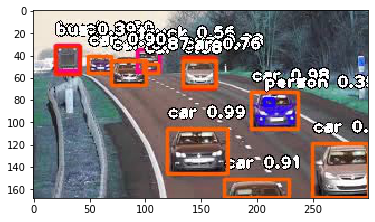

In [20]:
my_image = plt.imread("carimage4.jpg") 
img = plt.imshow(my_image)



In [0]:
import cv2
 
# Opens the Video file
cap= cv2.VideoCapture('fourcarimage_output.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('fourcarimage4.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


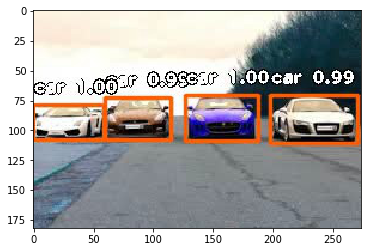

In [26]:
my_image = plt.imread("fourcarimag4.jpg") 
img = plt.imshow(my_image)


In [0]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join( execution_path, "car_video.mp4"),
                                output_file_path=os.path.join(execution_path, "traffic_mini_detected_1")
                                , frames_per_second=29, log_progress=True)
print(video_path)

/content/traffic_mini_detected_1.avi
